### Research question: Can we predict whether someone will vote based on demographic factors?

In [1]:
from pydataset import data

import warnings
warnings.filterwarnings("ignore")

data('voteincome', show_doc=True)

data('voteincome')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

voteincome

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Sample Turnout and Demographic Data from the 2000 Current Population Survey

### Description

This data set contains turnout and demographic data from a sample of
respondents to the 2000 Current Population Survey (CPS). The states
represented are South Carolina and Arkansas. The data represent only a sample
and results from this example should not be used in publication.

### Usage

    data(voteincome)

### Format

A data frame containing 7 variables ("state", "year", "vote", "income",
"education", "age", "female") and 1500 observations.

`state`

a factor variable with levels equal to "AR" (Arkansas) and "SC" (South
Carolina)

`year`

an integer vector

`vote`

an integer vector taking on values "1" (Voted) and "0" (Did Not Vote)

`income`

an integer vector ranging from "4" (Less than \$5000) to "17" (Greater than
\$75000) denoting family income. See the CPS codebook for more info

In [2]:
df = data('voteincome')

In [3]:
type(df)

pandas.core.frame.DataFrame

#### Drop the state and year columns.

In [4]:
df = df.drop(['state', 'year'], axis = 1)
df.head()

,vote,income,education,age,female
1,1,9,2,73,0
2,1,11,2,24,0
3,0,12,2,24,1
4,1,16,4,40,0
5,1,10,4,85,1


In [5]:
df.describe()

,vote,income,education,age,female
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,0.855333,12.464000,2.651333,49.261333,0.559333
std,0.351882,3.915643,1.021009,17.471134,0.496633
min,0.000000,4.000000,1.000000,18.000000,0.000000
25%,1.000000,9.000000,2.000000,36.000000,0.000000
50%,1.000000,13.000000,3.000000,49.000000,1.000000
75%,1.000000,16.000000,4.000000,62.000000,1.000000
max,1.000000,17.000000,4.000000,85.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 1 to 1500
Data columns (total 5 columns):
vote         1500 non-null int64
income       1500 non-null int64
education    1500 non-null int64
age          1500 non-null int64
female       1500 non-null int64
dtypes: int64(5)
memory usage: 70.3 KB


#### Split the data into train and test datasets. We will be predicting whether or not someone votes based on the the remaining features.

In [7]:
X = df.drop(columns=['vote'])
y = df[['vote']]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=123, stratify=df.vote)

In [9]:
y_train.head()

,vote
903,1
1093,1
57,1
1240,1
95,1


#### Fit a k-neighbors classifier on the training data. Use 4 for your number of neighbors. How accurate is your model? How does it perform on the test data?

In [10]:
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [11]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print()
print(confusion_matrix(y_train, y_pred))
print()
print(classification_report(y_train, y_pred))

Accuracy of KNN classifier on training set: 0.87

[[102  50]
 [ 84 814]]

              precision    recall  f1-score   support

           0       0.55      0.67      0.60       152
           1       0.94      0.91      0.92       898

    accuracy                           0.87      1050
   macro avg       0.75      0.79      0.76      1050
weighted avg       0.89      0.87      0.88      1050



#### Try our these values for k: 1, 2, 3, and 10. Which gives the best accuracy? Which gives the best accuracy on the test data set?

In [12]:
knn = KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [13]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print()
print(confusion_matrix(y_train, y_pred))
print()
print(classification_report(y_train, y_pred))

Accuracy of KNN classifier on training set: 0.98

[[137  15]
 [  9 889]]

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       152
           1       0.98      0.99      0.99       898

    accuracy                           0.98      1050
   macro avg       0.96      0.95      0.95      1050
weighted avg       0.98      0.98      0.98      1050



In [14]:
knn = KNeighborsClassifier(n_neighbors=2, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [15]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print()
print(confusion_matrix(y_train, y_pred))
print()
print(classification_report(y_train, y_pred))

Accuracy of KNN classifier on training set: 0.92

[[146   6]
 [ 77 821]]

              precision    recall  f1-score   support

           0       0.65      0.96      0.78       152
           1       0.99      0.91      0.95       898

    accuracy                           0.92      1050
   macro avg       0.82      0.94      0.87      1050
weighted avg       0.94      0.92      0.93      1050



In [16]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [17]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print()
print(confusion_matrix(y_train, y_pred))
print()
print(classification_report(y_train, y_pred))

Accuracy of KNN classifier on training set: 0.91

[[ 89  63]
 [ 35 863]]

              precision    recall  f1-score   support

           0       0.72      0.59      0.64       152
           1       0.93      0.96      0.95       898

    accuracy                           0.91      1050
   macro avg       0.82      0.77      0.80      1050
weighted avg       0.90      0.91      0.90      1050



In [18]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [19]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print()
print(confusion_matrix(y_train, y_pred))
print()
print(classification_report(y_train, y_pred))

Accuracy of KNN classifier on training set: 0.86

[[ 19 133]
 [ 13 885]]

              precision    recall  f1-score   support

           0       0.59      0.12      0.21       152
           1       0.87      0.99      0.92       898

    accuracy                           0.86      1050
   macro avg       0.73      0.56      0.57      1050
weighted avg       0.83      0.86      0.82      1050



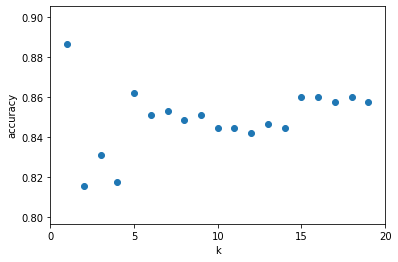

In [21]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
plt.show()

### Conclusion: demographic factors are good indicators for whether someone will vote.